In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [2]:
from utility import *
from trends import *
from plot import *
from kpi_computation import *

1. The features in the dataset are continuous. They are as follows:
    - Power consumed by different components
    - Factors influencing power consumption 
    - Time series in an interval of 5 minutes for 2 vessels, spanning across a year. That makes it $12*24*365 = 105120$ data points for each vessel.


In [3]:
# Read the data
df = pd.read_csv('data/data.csv', header = 0)
df.head()

,Start Time,End Time,Vessel Name,Power Galley 1 (MW),Power Galley 2 (MW),Power Service (MW),HVAC Chiller 1 Power (MW),HVAC Chiller 2 Power (MW),HVAC Chiller 3 Power (MW),Scrubber Power (MW),Sea Temperature (Celsius),Boiler 1 Fuel Flow Rate (L/h),Boiler 2 Fuel Flow Rate (L/h),Incinerator 1 Fuel Flow Rate (L/h),Diesel Generator 1 Power (MW),Diesel Generator 2 Power (MW),Diesel Generator 3 Power (MW),Diesel Generator 4 Power (MW),Latitude (Degrees),Longitude (Degrees),Relative Wind Angle (Degrees),True Wind Angle (Degrees),Depth (m),Relative Wind Direction (Degrees),True Wind Direction (Degrees),Draft (m),Speed Over Ground (knots),True Wind Speed (knots),Relative Wind Speed (knots),Speed Through Water (knots),Local Time (h),Trim (m),Propulsion Power (MW),Port Side Propulsion Power (MW),Starboard Side Propulsion Power (MW),Bow Thruster 1 Power (MW),Bow Thruster 2 Power (MW),Bow Thruster 3 Power (MW),Stern Thruster 1 Power (MW),Stern Thruster 2 Power (MW),Main Engine 1 Fuel Flow Rate (kg/h),Main Engine 2 Fuel Flow Rate (kg/h),Main Engine 3 Fuel Flow Rate (kg/h),Main Engine 4 Fuel Flow Rate (kg/h)
0,2023-01-01T00:00:00,2023-01-01T00:05:00,Vessel 1,0.0946,0.1384,5.4654,0.5074,0.0,0.4979,0.4191,27.3000,0.0000,0.0,19.0090,0.0,0.0,0.0,7.3349,17.72523,-65.45738,8.4428,10.9049,NaN,64.3112,66.7735,7.8721,7.6300,19.5050,27.0579,7.8881,19.67367,-0.1425,1.8691,0.8854,0.9837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1645.82000
1,2023-01-01T00:05:00,2023-01-01T00:10:00,Vessel 1,0.0540,0.1370,5.4387,0.5158,0.0,0.4982,0.4204,27.3000,47.7695,0.0,216.3180,0.0,0.0,0.0,7.3011,17.73088,-65.44803,41.3100,78.7817,NaN,62.8161,64.3452,7.8713,7.5800,19.2968,26.8067,7.7438,19.75763,-0.1405,1.8622,0.8737,0.9885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1643.78999
2,2023-01-01T00:10:00,2023-01-01T00:15:00,Vessel 1,0.0439,0.1785,5.5265,0.5117,0.0,0.5032,0.4199,27.3000,77.2034,0.0,439.4300,0.0,0.0,0.0,7.3299,17.73655,-65.43887,23.9997,33.6216,NaN,80.7356,90.3574,7.8718,7.4379,19.4491,25.8380,7.6320,19.84158,-0.1450,1.8036,0.8441,0.9595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1642.07000
3,2023-01-01T00:15:00,2023-01-01T00:20:00,Vessel 1,0.0733,0.1725,5.5257,0.5177,0.0,0.5103,0.4188,27.3076,60.6369,0.0,218.2797,0.0,0.0,0.0,7.3712,17.74202,-65.42980,14.5540,20.0348,NaN,75.9723,81.4529,7.8710,7.3979,20.6231,27.6498,7.5080,19.92551,-0.1308,1.8457,0.8543,0.9914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1650.71000
4,2023-01-01T00:20:00,2023-01-01T00:25:00,Vessel 1,0.0780,0.1397,5.4634,0.5169,0.0,0.5100,0.4203,27.3518,55.2184,0.0,0.0000,0.0,0.0,0.0,7.3032,17.74713,-65.42042,14.5632,20.0328,NaN,74.6509,80.1204,7.8707,7.4343,20.4554,27.5341,7.5521,20.00947,-0.1269,1.8399,0.8467,0.9932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1644.54000


In [4]:
# Check the data types and column names
df.dtypes

Start Time                               object
End Time                                 object
Vessel Name                              object
Power Galley 1 (MW)                     float64
Power Galley 2 (MW)                     float64
Power Service (MW)                      float64
HVAC Chiller 1 Power (MW)               float64
HVAC Chiller 2 Power (MW)               float64
HVAC Chiller 3 Power (MW)               float64
Scrubber Power (MW)                     float64
Sea Temperature (Celsius)               float64
Boiler 1 Fuel Flow Rate (L/h)           float64
Boiler 2 Fuel Flow Rate (L/h)           float64
Incinerator 1 Fuel Flow Rate (L/h)      float64
Diesel Generator 1 Power (MW)           float64
Diesel Generator 2 Power (MW)           float64
Diesel Generator 3 Power (MW)           float64
Diesel Generator 4 Power (MW)           float64
Latitude (Degrees)                      float64
Longitude (Degrees)                     float64
Relative Wind Angle (Degrees)           

# Vessel - Level Analysis

In [5]:
dfv = pick_vessel(df, 'Vessel 1')
# dfv = pick_vessel(df, 'Vessel 2')
# dfv = df

In [ ]:
feature_distribution(dfv)

**Comments (Vessel 1):**
1. Power Galleys: Mostly constant range of power consumption in operation. Less variation and wouldn't contribute much in forecast models
2. HVAC Chillers: A lot of variation, but extremely skewed in the sense that most of of the operation range is fixed
3. 

In [ ]:
missing_values = dfv.isna().sum()
missing_values.plot(kind='bar',figsize=(12,5), title='Missing Values')  # Plot the missing values

### Impute the missing Values:
1. For features that have <1%  missing values, impute by interpolating them using closest non-missing values as the features are all usually smooth within the 5mins time intervals in which they are recorded
2. For features that have >20% missing values, impute by using median of the column/feautre

In [ ]:
# Imputing the missing values
missing_values

In [6]:
col_to_interpolate = dfv.columns.difference(['Depth (m)', 'Start Time', 'End Time', 'Vessel Name']) # Columns to interpolate

In [7]:
impute_time_series(dfv, col_to_interpolate) # Imputation via interpolation for the columns with < 1% missing values as they are likely to be continuous in time
dfv.isna().sum()

c:\Users\karth\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Start Time                                  0
End Time                                    0
Vessel Name                                 0
Power Galley 1 (MW)                         0
Power Galley 2 (MW)                         0
Power Service (MW)                          0
HVAC Chiller 1 Power (MW)                   0
HVAC Chiller 2 Power (MW)                   0
HVAC Chiller 3 Power (MW)                   0
Scrubber Power (MW)                         0
Sea Temperature (Celsius)                   0
Boiler 1 Fuel Flow Rate (L/h)               0
Boiler 2 Fuel Flow Rate (L/h)               0
Incinerator 1 Fuel Flow Rate (L/h)          0
Diesel Generator 1 Power (MW)               0
Diesel Generator 2 Power (MW)               0
Diesel Generator 3 Power (MW)               0
Diesel Generator 4 Power (MW)               0
Latitude (Degrees)                          0
Longitude (Degrees)                         0
Relative Wind Angle (Degrees)               0
True Wind Angle (Degrees)         

In [8]:
median_depth = dfv['Depth (m)'].median() # impution via median value as more than 20% of the values are missing
dfv['Depth (m)'].fillna(median_depth, inplace=True)
dfv.isna().sum()

c:\Users\karth\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Start Time                              0
End Time                                0
Vessel Name                             0
Power Galley 1 (MW)                     0
Power Galley 2 (MW)                     0
Power Service (MW)                      0
HVAC Chiller 1 Power (MW)               0
HVAC Chiller 2 Power (MW)               0
HVAC Chiller 3 Power (MW)               0
Scrubber Power (MW)                     0
Sea Temperature (Celsius)               0
Boiler 1 Fuel Flow Rate (L/h)           0
Boiler 2 Fuel Flow Rate (L/h)           0
Incinerator 1 Fuel Flow Rate (L/h)      0
Diesel Generator 1 Power (MW)           0
Diesel Generator 2 Power (MW)           0
Diesel Generator 3 Power (MW)           0
Diesel Generator 4 Power (MW)           0
Latitude (Degrees)                      0
Longitude (Degrees)                     0
Relative Wind Angle (Degrees)           0
True Wind Angle (Degrees)               0
Depth (m)                               0
Relative Wind Direction (Degrees) 

In [ ]:
dfv.head()

### Multi-Collinearity Check

In [ ]:
# Correlation matrix
dfv_sub = dfv.iloc[:,3:]
corr = dfv_sub.corr()

In [ ]:
high_corr = []
for i in corr.columns:
    high_corr.append(corr[(corr[i] > 0.8) | (corr[i] < -0.8)][i])
print(f'The highly correlated columns are:{high_corr}')

In [ ]:
# Plot the correlation matrix
fig, ax = plt.subplots(figsize=(24,20))
sns.heatmap(data = corr[(corr > 0.8) | (corr < -0.8)], vmin=-1,vmax=1, cmap='coolwarm', ax = ax, annot= True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Correlation Matrix')
plt.show()

**Comments (Vessel 1):**
1. Diesel Generators' Power are highly correlated to corresponding Main Engine's Fuel flow rate 
2. Propulsion power is a linear combination of Port Side Propulsion Power and Starboard Side Propulsion Power 
3. Speed through water and Speed over ground are positively correlated to the Propulsion Power
4. Sea water temperature reducing as the latitude is increasing completely makes sense. This is because, temperatures are lower as one moves towards the poles

**Comments (Vessel 2):**
1. Diesel

### Trend and seasonality analysis

In [9]:
# Resampling the data for hourly, daily, weekly and seasonal trends
hourly_df, daily_df, weekly_df, monthly_df = resample(dfv)

c:\DDS\Track_DS\git\Cruise_Performance_Analysis\trends.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Start Time'] = pd.to_datetime(data['Start Time'])


| Column Name |
|-------------|
| Power Galley 1 (MW) |
| Power Galley 2 (MW) |
| Power Service (MW) |
| HVAC Chiller 1 Power (MW) |
| HVAC Chiller 2 Power (MW) |
| HVAC Chiller 3 Power (MW) |
| Scrubber Power (MW) |
| Sea Temperature (Celsius) |
| Boiler 1 Fuel Flow Rate (L/h) |
| Boiler 2 Fuel Flow Rate (L/h) |
| Incinerator 1 Fuel Flow Rate (L/h) |
| Diesel Generator 1 Power (MW) |
| Diesel Generator 2 Power (MW) |
| Diesel Generator 3 Power (MW) |
| Diesel Generator 4 Power (MW) |
| Latitude (Degrees) |
| Longitude (Degrees) |
| Relative Wind Angle (Degrees) |
| True Wind Angle (Degrees) |
| Depth (m) |
| Relative Wind Direction (Degrees) |
| True Wind Direction (Degrees) |
| Draft (m) |
| Speed Over Ground (knots) |
| True Wind Speed (knots) |
| Relative Wind Speed (knots) |
| Speed Through Water (knots) |
| Local Time (h) |
| Trim (m) |
| Propulsion Power (MW) |
| Port Side Propulsion Power (MW) |
| Starboard Side Propulsion Power (MW) |
| Bow Thruster 1 Power (MW) |
| Bow Thruster 2 Power (MW) |
| Bow Thruster 3 Power (MW) |
| Stern Thruster 1 Power (MW) |
| Stern Thruster 2 Power (MW) |
| Main Engine 1 Fuel Flow Rate (kg/h) |
| Main Engine 2 Fuel Flow Rate (kg/h) |
| Main Engine 3 Fuel Flow Rate (kg/h) |
| Main Engine 4 Fuel Flow Rate (kg/h) |

In [ ]:
# Pick a feature from the above list to visualize the trend over
trend_plot(hourly_df, daily_df, weekly_df, monthly_df, 'Propulsion Power (MW)')

In [ ]:
# Pick 2 features from the above list to visualize their relationship with each other over time
pair_plot(hourly_df, daily_df, weekly_df, monthly_df, 'Propulsion Power (MW)', 'Relative Wind Speed (knots)')

### KPI Generation and Analysis
3 KPIs are generated based on domain knowledge and research:
1. Fuel Consumption per nautical mile ( A measure of fuel efficiency)
2. Total Power Consumed
3. Power Specific Fuel Consumption

**Method**
- Fuel Consumption per nautical mile = Sum of Engine Fuel Flow / Speed through water. It is capped at a maximum of 5000, because it goes to infinity when speed through is very close to 0. This happens while docking and anchoring
- Total Power Consumed = Sum power consumed by Power Galleys, HVAC Chillers, Power Service, Scrubber, Propulsion and Thrusters
- Power Specific Fuel Consumption = Fuel flow in engines, boilers and incinerator/ Total power consumed. Similar to the very commonly used fuel efficiency or brake specific fuel consumption (BSFC). It is used to assess the efficiency of any engine that burns fuel and produces rotational power, typically internal combustion engines. Assuming Fuel in Boiler and Incinerator to be Diesel and the density to be 0.85 kg/litre, for mass flow calculation.

In [10]:
h_kpi = compute_kpis(hourly_df)

In [ ]:
h_kpi.head()

In [11]:
h_kpi['Fuel Consumption per nautical mile'].describe()

count    8760.000000
mean     2457.516023
std      1221.875339
min         0.000000
25%      1139.851460
50%      2198.528747
75%      3758.369128
max      4000.000000
Name: Fuel Efficiency (consumption/nautical mile), dtype: float64

In [ ]:
plt.figure(figsize=(12,6))
h_kpi['Fuel Consumption per nautical mile'].hist(bins=30, alpha=0.75, color='blue')
plt.show()

In [12]:
d_kpi = compute_kpis(daily_df)
w_kpi = compute_kpis(weekly_df)
m_kpi = compute_kpis(monthly_df)

In [ ]:
pair_plot(h_kpi, d_kpi, w_kpi, m_kpi, 'Total Power Consumed (MW)', 'Sea Temperature (Celsius)')

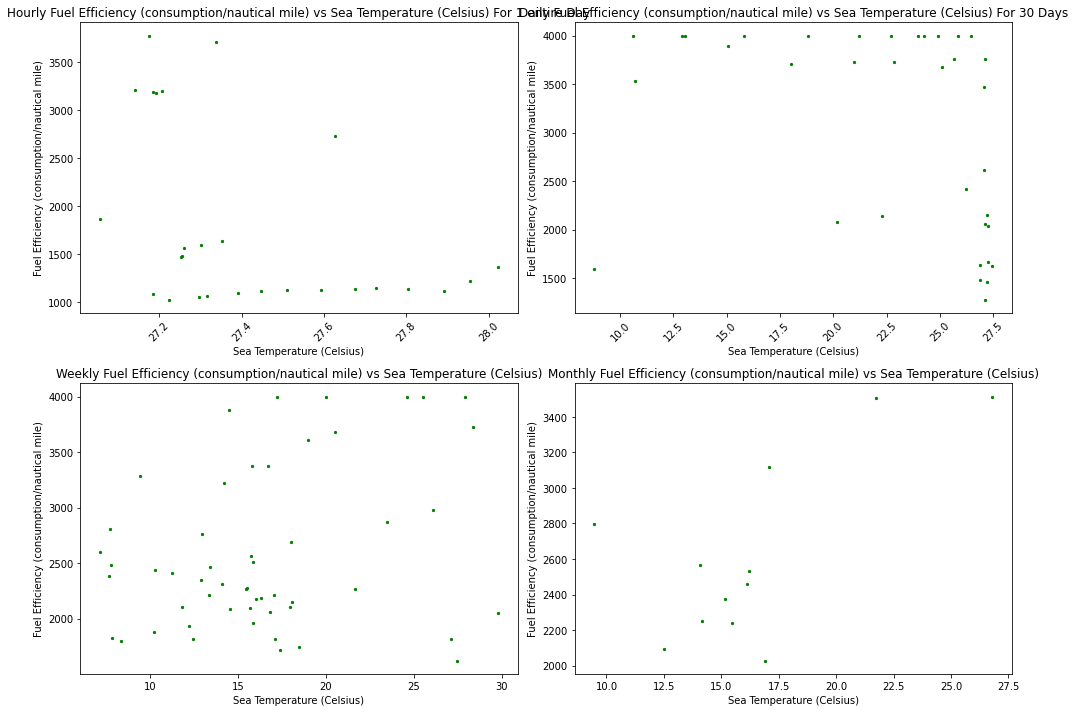

In [13]:
pair_plot(h_kpi, d_kpi, w_kpi, m_kpi, 'Fuel Consumption per nautical mile', 'Sea Temperature (Celsius)')

**Comments(Vessel 1):**
- On the long-term front, with seasonality in play: we can observe from the monthly chart that for warmer conditions of water, more power is consumed. 
- This totally makes sense as the water would be less dense and the ship would have to work generate thrust to move through it
- The effect is not fully observed in the Fuel Efficiency chart as lower density also means lower resistance to move through water. 

In [ ]:
pair_plot(h_kpi, d_kpi, w_kpi, m_kpi, 'Total Power Consumed (MW)', 'Speed Through Water (knots)')

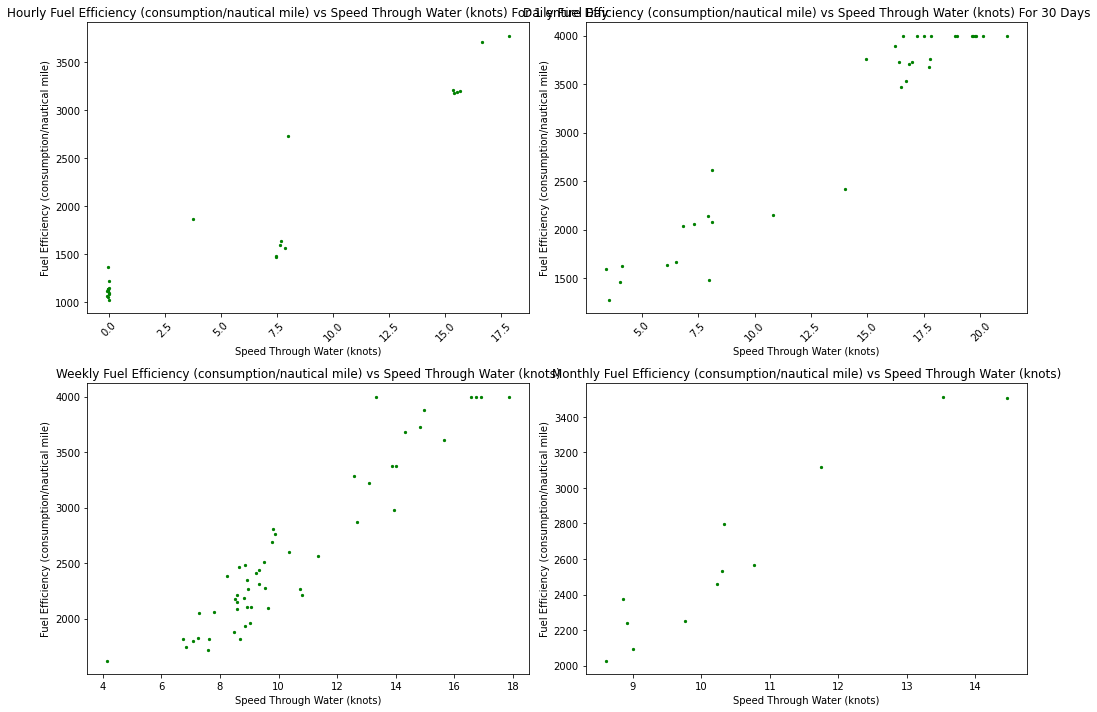

In [14]:
pair_plot(h_kpi, d_kpi, w_kpi, m_kpi, 'Fuel Consumption per nautical mile', 'Speed Through Water (knots)')

**Comments (Vessel 1)**
- Based on the scatter plots, the optimal speed of operation are betweent 7.5-8.5 and 15-17.5, where there is a horizontal spread of points: the fuel required to operate in these range of speeds seem to be the same and not fluctuate a lot

In [ ]:
weekly_df.reset_index(inplace=True)
weekly_df.head()

In [ ]:
hourly_df.to_csv("hourly.csv")

In [ ]:
# Generate column Table
table = '| Column Name |\n|-------------|\n'
for column in weekly_df.columns:
    table += f'| {column} |\n'
print(table)